# **Week 2. Supervised Learning**

2주차 과제는 지도학습의 회귀, 분류 모델을 학습-평가하는 과정을 간소하게 재현한 코드입니다.

1. 적힌 코드를 따라가며, 배운 내용과 어떻게 연관되는지 등을 생각하거나 찾아본 후, 주석으로 달아주시면 좋을 것 같습니다.
2. 더불어 생각해볼 만한 질문들을 중간에 달아두었으니, 이에 대한 고민과 답변을 작성해주시면 됩니다.

# **1. 회귀 - with diabetes dataset**

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 로드 및 탐색

In [2]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

In [3]:
# 데이터 크기와 피처(특성) 정보 출력
print(f"Dataset Shape: {X.shape}")  # ( , )
print(f"Feature Names: {diabetes.feature_names}")
print(f"Target (y) Sample: {y[:5]}")  # 타겟 값 일부 확인


Dataset Shape: (442, 10)
Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target (y) Sample: [151.  75. 141. 206. 135.]


In [4]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [5]:
print(df['sex'])

0      0.050680
1     -0.044642
2      0.050680
3     -0.044642
4     -0.044642
         ...   
437    0.050680
438    0.050680
439    0.050680
440   -0.044642
441   -0.044642
Name: sex, Length: 442, dtype: float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


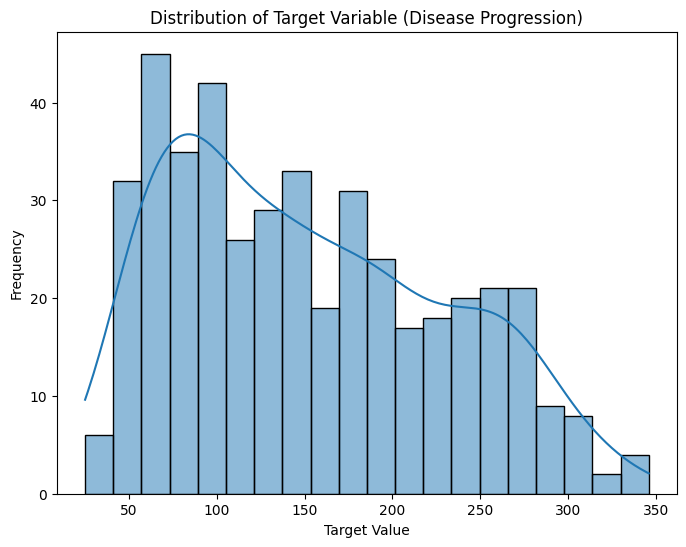

In [8]:
# 히스토그램으로 타겟 값 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=20, kde=True) #20가의 구간으로 데이터를 나눔(bin) , KDE: 커널 밀도 추정으로 데이터의 분포를 부드러운 곡선으로 나타냄
plt.title("Distribution of Target Variable (Disease Progression)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

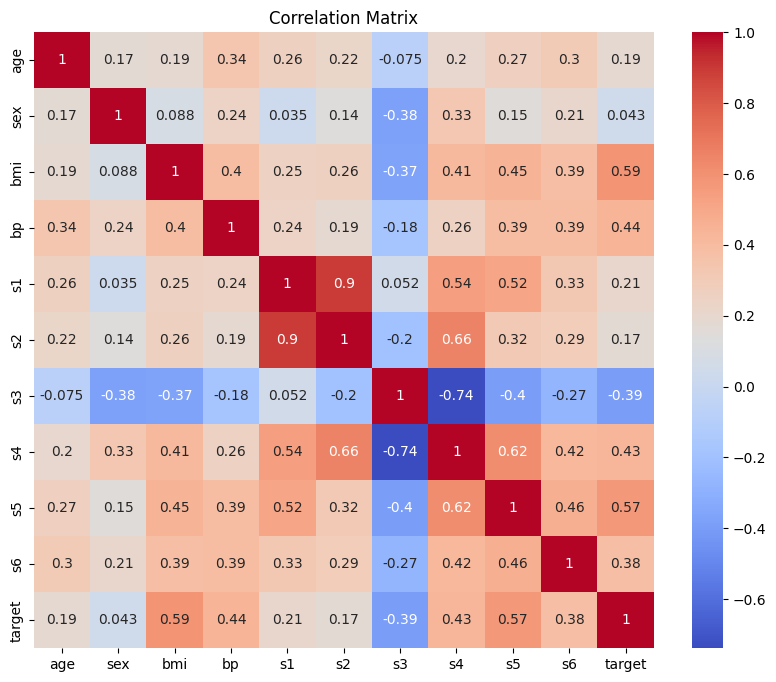

In [9]:
# 상관 행렬 및 히트맵 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


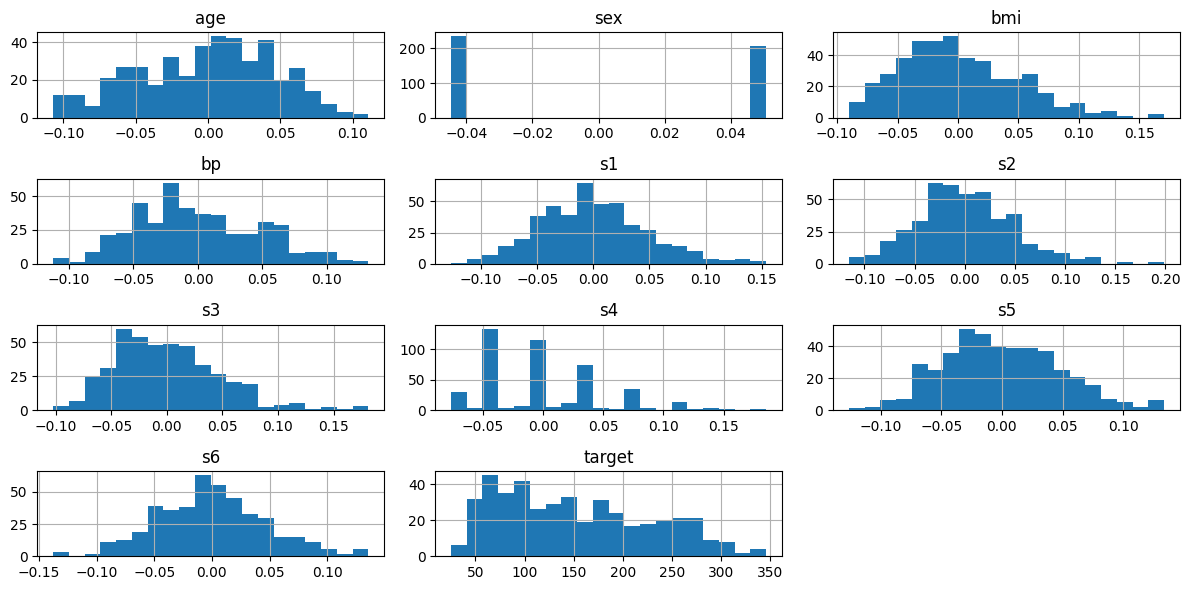

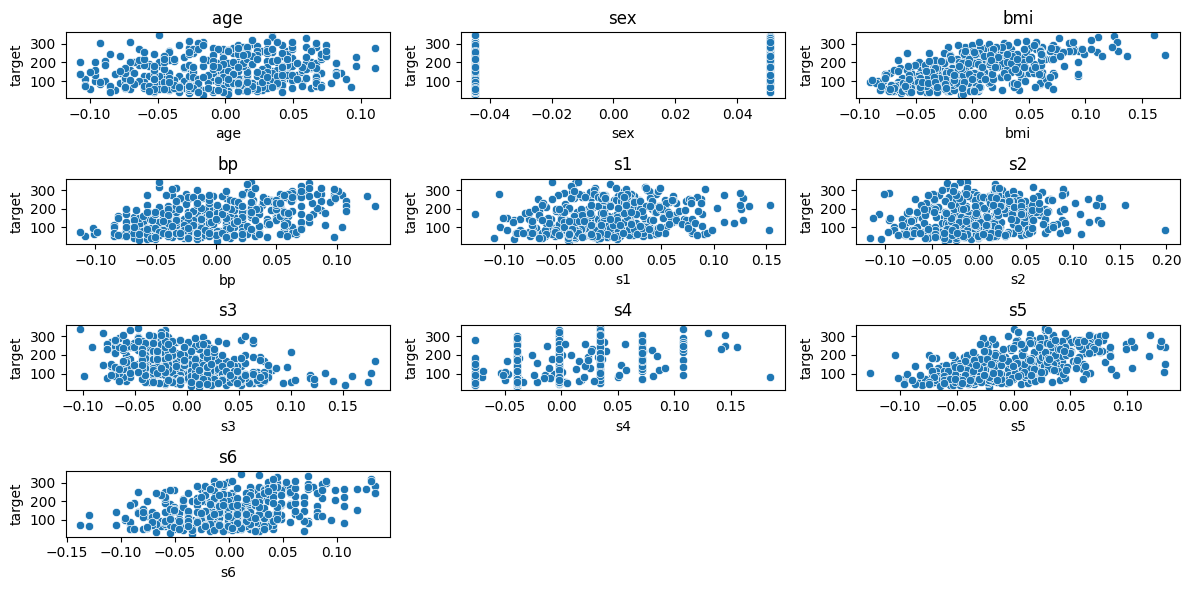



  Feature  Mutual Information
2     bmi            0.169333
8      s5            0.148608
7      s4            0.103129
9      s6            0.095845
6      s3            0.075273
4      s1            0.063853
3      bp            0.055604
1     sex            0.045234
5      s2            0.015634
0     age            0.004883
가장 높은 Mutual Information을 가지는 피쳐: bmi
가장 높은 Mutual Information의 값: 0.16933281752773555

가장 높은 상관관계를 가지는 피쳐:  bmi
상관계수 값: 0.5864501344746885


In [16]:
# Q1-1: 어떤 피처(특성)가 가장 중요한지, 직접 데이터를 분석해보세요.
df.hist(bins=20, figsize=(12,6))
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(12,6))

for i, feature in enumerate(feature_names): #enumerate: return (index, value)
  row = i // 3 #axes 에 배치
  col = i % 3
  sns.scatterplot( x=df[feature] , y = 'target', data=df, ax= axes[row][col])
  axes[row][col].set_title(f'{feature}')
plt.delaxes(axes[3][1]) # 비어있는거 제거(그냥 하나씩 찝어서 제거함)
plt.delaxes(axes[3][2])
plt.tight_layout()
plt.show()
print('\n')
#선형적인 관계외에 비선형적인 관계도 고려해야할 필요가 있을 것 같음.
# 상관관계외에 상호 의존성인 Mutual Information(MI)을 확인해보자
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X, y) # 각 피쳐와 타깃간에 MI 계산
mutual_info_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information': mutual_info})
#표 형태로 출력하고자 정리
mutual_info_df_sort = mutual_info_df.sort_values(by = 'Mutual Information', ascending =False)
# Mutual Information에서 높은 형태로 정렬
print(mutual_info_df_sort)

mutual_info_max = mutual_info_df['Mutual Information'].idxmax()
#Mutual Information의 최대값의 인덱스 번호를 저장
print(f"가장 높은 Mutual Information을 가지는 피쳐: {mutual_info_df.iloc[mutual_info_max,0]}")
print(f"가장 높은 Mutual Information의 값: {mutual_info_df.iloc[mutual_info_max,1]}\n")
#인덱스 번호에 맞는 feature 이름과 MI의 값을 출력
#이를 통해 BMI가 가장 중요하다고 생각할 수 있겠다.

# Q1-2: 어떤 피처가 'target'과 가장 높은 상관관계를 가지나요?
target_corr = df.corr()['target'].drop('target')
#target은 자기 스스로 1의 상관계수를 가지므로 제거
# target과 각 열의 상관관계 계산 corr()['target']
# target_corr은 pandasSeries의 형태로 저장됨.(1차원임)

#위의 이유로 인해 숫자 인덱스가 아닌 feature가 인덱스의 역할을 수행하게 됨
highest_corr_features = target_corr.abs().idxmax()
#음의 상관계수 고려해 절대값화
# idxmax()를 통해 최대값을 가지는 인덱스를 반환(이 경우 최대값을 가지는 feature)
highest_corr_value = target_corr.abs().max()

print(f"가장 높은 상관관계를 가지는 피쳐:  {highest_corr_features}")
print(f"상관계수 값: {highest_corr_value}")

## 2. 데이터 전처리: 데이터 분할 및 스케일링


In [17]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Q2: 데이터 분할 비율을 70:30 또는 90:10으로 변경하면 결과는 어떻게 달라질까요?
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

model = LinearRegression()
model.fit(X_train1, y_train1)

y_pred1 = model.predict(X_test1)

mse = mean_squared_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Squared Error (MSE): 2821.75
R² Score: 0.48


In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

model = LinearRegression()
model.fit(X_train2, y_train2)

y_pred2 = model.predict(X_test2)

mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Squared Error (MSE): 2743.91
R² Score: 0.55


In [19]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Q3: 스케일링을 하지 않고 학습하면 어떤 결과가 나올까요? 한 번 실험해 보세요.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train3, y_train3)

print("Model Coefficients: ", model.coef_)
print("Model Intercept: ", model.intercept_)

# 스케일링 혹은 표준화를 진행하지 않으면, 각 피쳐 값의 범위가 가중치에 직접적인 영향을 준다.
# 예를 들어 첫번째 피쳐가 0과 1 사이의 값이고, 두번째 피쳐가 100부터 1000사이의 값이라면
# 상대적으로 두번째 피쳐의 가중치가 더 커질 수도 있다.(모델에 더 큰 영향을 줄 수 있다)

Model Coefficients:  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Model Intercept:  151.34560453985995


## 3. 모델 적합 (선형 회귀)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)  # 학습 진행

# 모델의 가중치 출력
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
#model 절편

Model Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Model Intercept: 153.73654390934846


In [28]:
# Q4: 모델의 계수를 분석해보세요. 어떤 피처가 타겟에 가장 큰 영향을 미치는지 확인하세요.
model_coefficients = model.coef_
len(model_coefficients)
#10개인 것을 확인해보니 각 Coefficients들이 각각의 features에 대응됨
abs_coefficients = np.abs(model.coef_)
# 가중치를 비교를 위해서 절대값 처리
max_feature = feature_names[np.argmax(abs_coefficients)]
# 최대값을 가지는 인덱스를 뽑아서 feature_names에서 가져옴.
print(f"가장 큰 영향을 미친 피쳐: {max_feature}")

가장 큰 영향을 미친 피쳐: s1


In [21]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation

In [29]:
# 모델 평가

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 2900.19
R² Score: 0.45


In [ ]:
# (선택) Q5: MSE가 높거나 R² 점수가 낮다면, 데이터를 더 분석하거나 다른 모델을 시도해보세요.
# (선택) Q6: 선형 회귀 외에 Decision Tree, Random Forest를 사용해 결과를 비교해보세요.

# 2. **분류 - with Iris dataset**

In [35]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. 데이터 로드 및 탐색

In [36]:
iris = load_iris()
X, y = iris.data, iris.target

feature_names = iris.feature_names
class_names = iris.target_names

In [37]:
# 데이터 크기와 피처 정보 출력
print(f"Dataset Shape: {X.shape}")  # (샘플 수, 피쳐 수)
print(f"Feature Names: {iris.feature_names}")
print(f"Classes: {iris.target_names}")  # 클래스가 몇 개이고, 어떤 게 있는지 확인해 보세요
print(f"First 5 Samples:\n{X[:5]}")

Dataset Shape: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
First 5 Samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [38]:
# Q1: 각 클래스에 몇 개의 데이터가 있는지 확인해 보세요. 클래스 별 데이터가 균등하게 분포되어 있나요?
unique, counts = np.unique(y, return_counts=True)
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Class Distribution: {class_distribution}")

Class Distribution: {0: 50, 1: 50, 2: 50}


In [39]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['class'] = y
# X, y를 각각 붙임

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [41]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


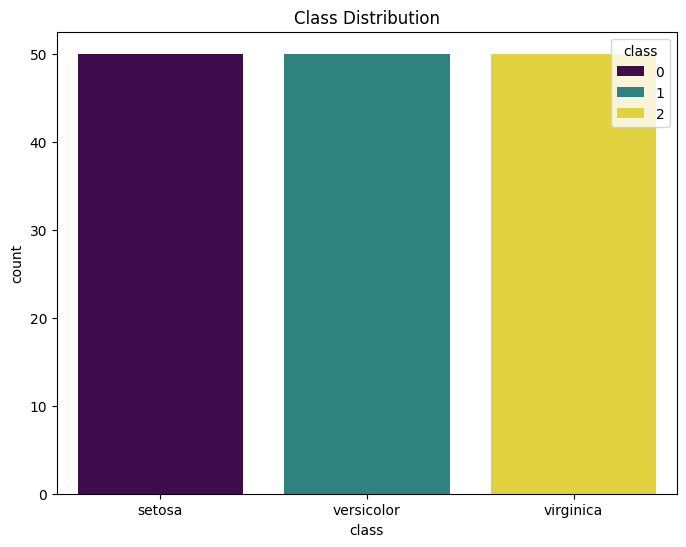

In [42]:
# 클래스별 데이터 분포 확인
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='viridis', hue='class')
plt.title("Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=class_names)
plt.show()

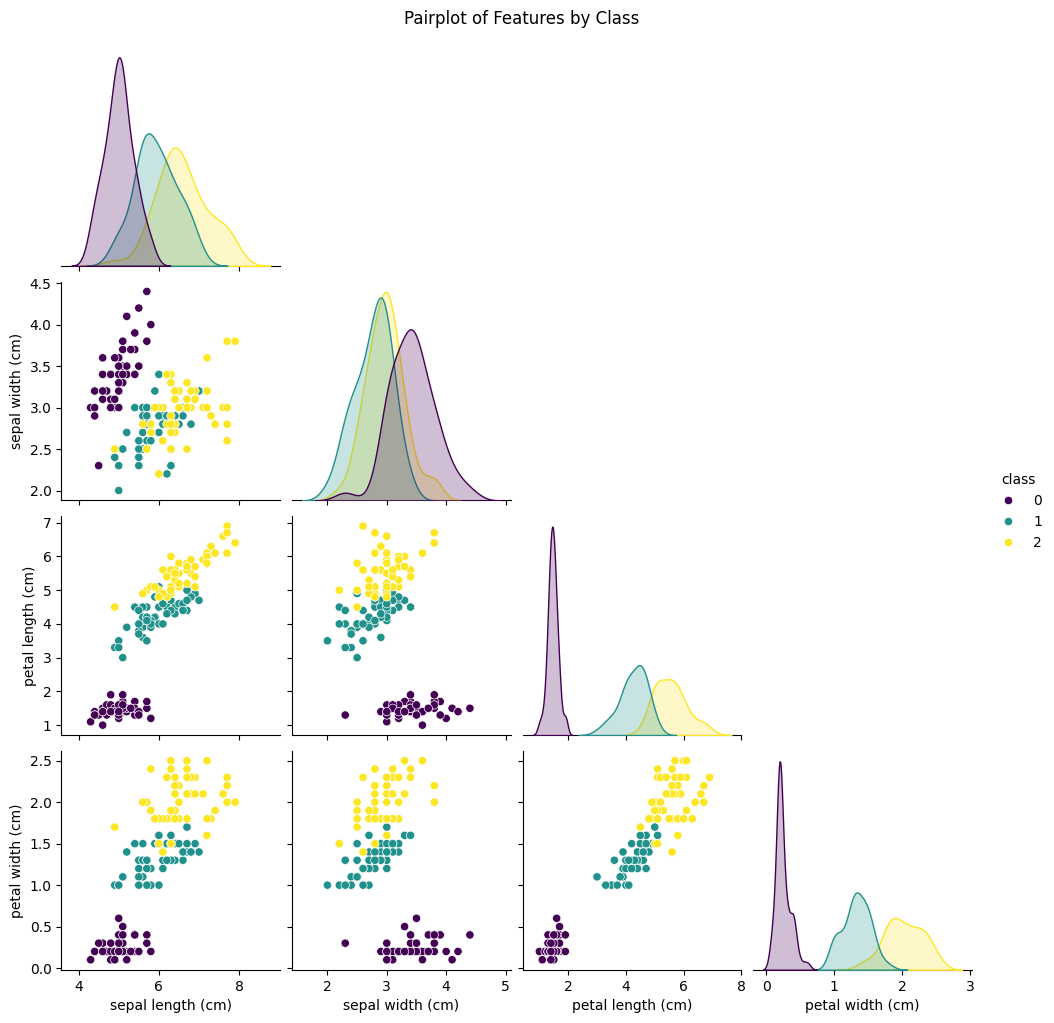

In [43]:
# 피처 간 산점도 행렬
sns.pairplot(df, hue='class', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()

## 2. 데이터 전처리: 데이터 분할 및 스케일링

In [44]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# Q2: stratify를 제외하면 클래스 비율이 어떻게 달라질까요? 확인해 보세요.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

unique, counts = np.unique(y_train1, return_counts=True)
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Train Data Class Distribution: {class_distribution}")

unique, counts = np.unique(y_test1, return_counts=True)
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Test Data Class Distribution: {class_distribution}")


Train Data Class Distribution: {0: 40, 1: 41, 2: 39}
Test Data Class Distribution: {0: 10, 1: 9, 2: 11}


In [50]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



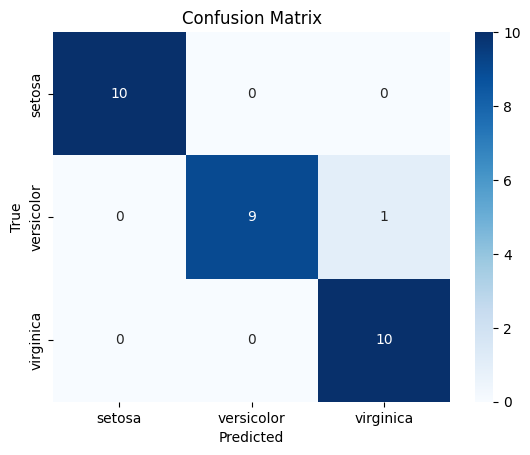

In [60]:
# Q3: 스케일링을 하지 않고 학습하면 정확도에 어떤 영향을 미칠까요?

# Colab 특성상 윗 셀에서 정의된 것에 영향을 받아 재현이 가능하다는 점에서 다시 데이터를 불러오겠다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_nonscaler = X_train
X_test_nonscaler = X_test

model = SVC(kernel = 'linear', C = 0.1)
model.fit(X_train_nonscaler,y_train)
y_pred = model.predict(X_test_nonscaler)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 대게의 경우에는 스케일링이 진행되지 않으면 범위가 큰 피쳐가 모델에 영향을 주는 정도가 커질 수 있다.
# 따라서 피쳐 값의 범위가 크나 잘못된 혹은 그다지 중요하지 않는 피쳐가 더 중요하게 간주되어 정확도가 낮아질 수 있다.
# 다만 이 경우에는 놀랍게도 정확도가 조금 올랐다.

## 3. 모델 적합 (SVM)

In [51]:
model = SVC(kernel='linear', C=0.1)  # 선형 커널 사용
model.fit(X_train, y_train)  # 모델 학습

SVC(C=0.1, kernel='linear')

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.75      0.90      0.82        10
   virginica       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



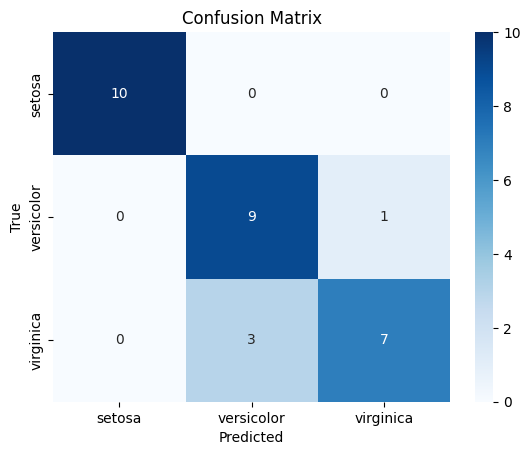

In [59]:
# Q4: C 값을 조정해보세요 (예: 0.1, 10). 모델의 성능에 어떤 영향을 미칠까요?
model_adjust = SVC(kernel = 'linear', C = 0.01)
model_adjust.fit(X_train,y_train)
y_adjust_pred = model_adjust.predict(X_test)

accuracy = accuracy_score(y_test, y_adjust_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_adjust_pred, target_names=iris.target_names))

cm1 = confusion_matrix(y_test, y_adjust_pred)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# C 값이 작아지면 잘못 분류된 샘플들이 늘어나고 정확도 성능이 낮아진다.
# C 값이 커지면 가능한 모든 샘플들이 정확하게 분류되고 정확도가 높아진다.

In [52]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation

In [53]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



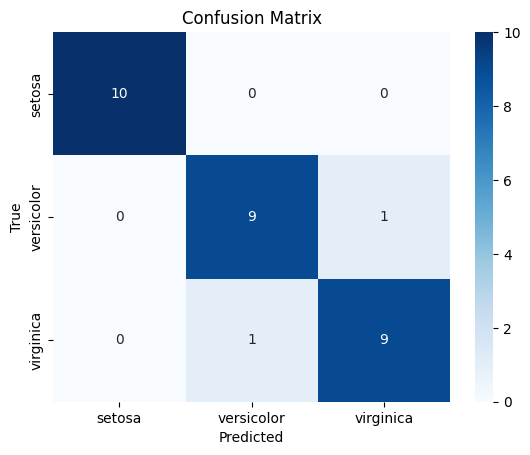

In [54]:
# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Q6: Confusion Matrix를 보고 결과를 해석해보세요.
# 예측한 setosa는 모두 참인 Setosa 였으sk
# versicolor, virginica는 예측한 10개 중에 1개는 setosa와 자신이 아닌 다른 종으로 잘못 분류했다.